### Present Value Concepts

**Future Value $fv$**: we move cashflow forward in time at interest rate $r$.  
*What is my money today worth in the future.*   

$fv = pv * (1+r)$

**Present Value $pv$** (also called Discouned Value): we move cashflow back in time.  
*I want to have cashflow C in the future, how much money do I need to invest today.*

$pv = \frac{fv}{(1+r)}$

**Net Present Value $npv$**:  

$C_0 + \frac{C_1}{1+r}$


In [1]:
from tvm import * 
import numpy as np
from itertools import * 
import numpy_financial as npf
import pandas as pd

### Practical Examples


In [2]:
# Suppose you want $500,000 when you retire 25 years from now.
# How much must you invest each year, starting at the end of this year,
# if the interest-rate is 8%a
print(npf.pmt(0.08,25,pv=0,fv=500000))

-6839.389525984054


In [3]:
# Suppose you have a loan of $100,000, what is your yearly
# payment, when you want to payoff the loan in 5 years at the interest
# rate of 10%
print(npf.pmt(0.1,5,pv=100000))

-26379.748079474524


In [4]:
# Suppose you have a loan of $100,000, what are your monthly
# payments, when you want to payoff the loan in 5 years at the interest
# rate of 10%
print(npf.pmt(0.1/12,5*12,pv=100000))

-2124.704471126833


In [5]:
# Suppose you want to pay $10,000 each year on your account
# for 25 years at the interest rate of 8%, what is your 
# bank account after 25 years
print(npf.fv(0.08,40,pv=0,pmt=10000))

-2590565.1870999876


In [6]:
# How much money do you need to put in the bank today so that you can 
# spend $10,000 every year for the next 25 years, starting at the
# end of this year? if r = 0 than you need 250000 on your bank account
print(npf.pv(0.05,25,fv=0,pmt=10000))

-140939.4456604476


In [7]:
# e.g what is the balance if I pay 750€ on my account every 3 month 
# for 10 years at the interest rate of 5%. 
compound_fixed(0, 750, 0.05, 4*10, m=4)[-1]

38905.663802471194

In [8]:
# yearly payment when taking a loan of 100k at 10% interest rate
yearly_pmt = pmt(n=5, r = 0.1, pv=100000)
print("yearly_pmt", yearly_pmt)
# remaining balance after 5 years
pval(0, r=0.1, n=3, pmt=yearly_pmt)

yearly_pmt 26379.74807947454


65602.52903310346

In [9]:
# Suppose you save the next 20 years until you are 50. Then you pause saving for the next 10y until you are 60
# Then from 60y to 80y you want to spend 100k every year. How much money you need to pay in every year from 30-50
#  to afford this, given interest rate is 8%

# in year 60 I need to put this amount in order to be able to spen 100k every year till 80y
p60 = pval(0, 0.08,n=20, pmt=100000)
# from 50-to 60 you rest the money at interest rate r
p50 = pval(p60, 0.08, 10)
# this iy yearly payment to achive fv after 20 years.
pmt(r=0.08,n=20, fv=p50)

9937.733254980118

In [10]:
# The stated annual interest rate is 11%, but interest is 
# compounded semi-annually and payments are monthly.
# What is the EAR?
((1+0.11/12)**12 - 1) / 12 * 100


0.9643236349601236

In [11]:
# Gloria is 39 and trying to plan for retirement. 
# She has put a budget together and plans to save $4,700 per year, 
# starting at the end of this year, in a retirement fund until she is 59.
#  Assume that she can make 4.0% on her account. How much will 
#  she have for retirement at age 59?
pmt = 4700 
n = 20
r = 0.04
fval(0, r=r,n=n,pmt=pmt)

139956.96930642682

In [12]:
# Dominique has just turned 58 and she has deposited her annual payment
# of $15,000 into her retirement account. She made her first such saving
# deposit into this fund on her 31st birthday. Dominique has also retired
# and wants to figure out how much money she has in her retirement account
# for her retired life. You are Dominique's friend who knows finance. How much
# is Dominique's savings worth today given that the fund has earned an annual
# return of 3.0%? (Enter just the number in dollars without the $ sign or a
# comma and round off decimals to the closest integer, i.e., rounding $30.49
# down to $30 and rounding $30.50 up to $31.)
pmt = 15000
n = 27
r = 0.03
print(fval(15000,r=r,n=n) + 15000)
print(fval(15000,r=r,n=n-1)+15000)


48319.335083552374
47348.869013157644


In [13]:
# Gerard has estimated that he is going to need enough 
# in his retirement fund to withdraw $85,000 per year beginning
# on his 66th birthday and for 19 additional years thereafter.
# How much will Gerard need in his retirement account at age 65 
# if his fund is expected to earn an annual return of 8.5%?
pmt = 85000
n = 20
r = 0.085
pval(fv=0,r=r,n=n,pmt=pmt)

804383.6116456415

In [14]:
# Huiling owns a rental property on Main street, but she is considering 
# selling the property to another real estate investor. In preparation
# for negotiating a price, Huiling wants to know the value of the property.
# The Net Operating Income (NOI) is the cash flow from real estate and the
# Cap Rate is the rate, where NOI is rental revenue less all expenses except 
# loan servicing. The property has an NOI of $21,000 per year. The local real
# estate market has a cap rate of 8%. What is a fair price for the property 
# assuming that the building's remaining life is 25 years? 
pmt = 21000
r = 0.08
n = 25
fv = fval(0, n=n,r=r, pmt=pmt)
pval(fv,r=r,n=n)

224170.29996036002

In [42]:
# Melanie and Stephen Jackson are purchasing their first house. 
# The house costs $340,000. They have put a 10% down payment
#  (that is, an amount that banks should require you to pay out-of-pocket), but will therefore 
# finance the rest. They are considering a fixed rate 15-year mortgage 
# at a 6.25% APR with monthly payments. How much will the Jacksons' first monthly payment be?
pv = 340000
loan = pv - pv*0.1
print(loan)
n = 15
r = 0.0625
pmt(r=r/12,n=n*12,pv=loan)

306000.0


TypeError: 'int' object is not callable

In [ ]:
# Bridgette's grandparents opened a savings account for 
# her and placed $700 in the account. The account pays 3.5% interest.
#  Bridgette wants to be a singer and she has her heart set on 
# a new karaoke machine. The machine costs $200. How much less will 
# the account be worth in 8 years if she buys the karaoke machine now versus leaving the account untouched? 
npf.fv(rate=0.035, nper=8,pmt=0, pv=700)*-1 - npf.fv(rate=0.035, nper=8,pmt=0, pv=500)*-1

263.3618073926806

In [41]:
# You take a loan of 100k at 6% interest rate, what is your yearly payments
# if you have to payback after 5 years 
r = 0.06 / 12
n = 5 * 12
loan = 100000
yearly_pmt = -1*npf.pmt(rate=r, nper = n, pv=loan)
repay = [-1 * npf.pv(rate=r,nper=n-i, fv=0, pmt=yearly_pmt) for i in range(n)]
interest = [ r * pmt for pmt in repay]
pd.DataFrame({"repay" : repay, "interest" : interest, "pmt" : yearly_pmt }).head()


,repay,interest,pmt
0,100000.000000,500.000000,1933.280153
1,98566.719847,492.833599,1933.280153
2,97126.273293,485.631366,1933.280153
3,95678.624507,478.393123,1933.280153
4,94223.737476,471.118687,1933.280153


In [ ]:
-1 * npf.pv(rate=r,nper=n-18, fv=0, pmt=yearly_pmt)

73074.7030261689

In [ ]:
loan_rest = loan - (yearly_pmt - loan * 0.06)
print(yearly_pmt - loan * 0.06, loan_rest)
loan_rest - (yearly_pmt - loan_rest * 0.06)

17739.640043118947 82260.35995688106


63456.34151117498

In [ ]:
# You have invested $75,000 in a trust fund at 7.5 percent
#  for your child's education. Your child will draw $12,000 
# per year from this fund for four years, starting at the end
#  of year seven. What will be the amount that will be left 
# over in this fund at end of year 10 after the child has
#  withdrawn the fourth time?
pv = 75000
r = 0.075
n = 7
p7 = npf.fv(rate=r,nper=n-1,pv=pv, pmt=0) * -1
print("after 7 years", p7)
npf.fv(rate=r,nper=4,pv=p7,pmt=-12000) * -1


after 7 years 115747.6144226074


100902.30466235334

In [107]:
# Carlos goes to the bank to take out a personal loan. 
# The stated annual interest rate is 8%, but interest 
# is compounded quarterly and he will make monthly payments. What is the EAR?
(1+0.1 / 4)**4 - 1


0.10381289062499954

In [138]:
# Gloria is 35 and trying to plan for retirement. She has put a budget together
# and plans to save $4,000 per year, starting at the end of this year, in a retirement 
# fund until she is 61. Assume that she can make 5.5% on her account. 
# How much will she have for retirement at age 61?
pmt = 4000
n = 61 - 35
r = 0.055
npf.fv(rate=r,nper=n,pv=0,pmt=pmt) 

-219863.92202145964

In [149]:
# Dominique has just turned 60 and she has deposited her annual payment of $15,000 
# into her retirement account. She made her first such saving deposit into this fund
# on her 32nd birthday. Dominique has also retired and wants to figure out how much 
# money she has in her retirement account for her retired life. You are Dominique's
# friend who knows finance. How much is Dominique's savings worth today given that
# the fund has earned an annual return of 4.5%? 
pmt  = 15000
n = 62 - 34 + 1
r = 0.03
round(npf.fv(rate=r,nper=n,pv=0,pmt=pmt)*-1)


678283

In [150]:
# Gerard has estimated that he is going to need enough in his
# retirement fund to withdraw $85,000 per year beginning on his 
# 56th birthday and for 29 additional years thereafter. How much 
# will Gerard need in his retirement account at age 55 if his fund
# is expected to earn an annual return of 7.5%?
npf.pv(rate=0.075, nper= 30, fv=0, pmt=85000) * -1

1003882.8325744815

In [123]:
# Huiling owns a rental property on Main street, but she is considering selling the 
# property to another real estate investor. In preparation for negotiating a price, Huiling
# wants to know the value of the property. The Net Operating Income (NOI) is the cash flow
# from real estate and the Cap Rate is the rate, where NOI is rental revenue less all expenses
# except loan servicing. The property has an NOI of $20,000 per year. The local real estate 
# market has a cap rate of 5%. What is a fair price for the property assuming that
#  the building's remaining life is 35 years? 
pmt = 20000
r = 0.05
n =  35
npf.fv(rate=r, nper=n,pmt=pmt, pv=0)  * -1

npf.pv(rate=r,nper=n,fv=1806406.1470369026, pmt=0)

-327483.8858589692

In [39]:
# Melanie and Stephen Jackson are purchasing their first house. 
# The house costs $400,000. They have put a 10% down payment 
# (that is, an amount that banks should require you to pay out-of-pocket), 
# but will therefore finance the rest. They are considering a fixed rate
# 15-year mortgage at a 7.75% APR with monthly payments.
#  How much will the Jacksons' first monthly payment be?
loan = 400000 - 400000*0.1
r = 0.0775
n = 15
npf.pmt(rate=r/12, nper=n*12,pv=loan)

-3388.5927109448057

In [48]:
# Flora, who has just celebrated her 30th birthday, will retire on her 
# 62nd birthday, and she has just set up a retirement plan to pay her
# income starting on her retirement day, and to continue paying for 19
# more years. Flora's goal is to receive $120,000 for each of these
# twenty years. In creating her retirement account, Flora has committed to set
# aside equal investments at the end of each year, for the next 31 years starting 
# on her 31st birthday. If the annual interest rate is 8%, how big should Flora's equal investments be?
n = 31
n2 = 20
pmt = 120000
r = 0.08
p62 = npf.pv(rate=r,nper=n2,pmt=120000, fv=0)*-1
npf.pmt(rate=r, nper=n, fv=p62, pv=0)


-9551.82129708728

In [54]:
npf.pmt(rate=r,nper=20, pv=1178177)

-119999.92983463308

In [ ]:
# Flora, who has just celebrated her 30th birthday, will retire on her 
# 62nd birthday, and she has just set up a retirement plan to pay her
# income starting on her retirement day, and to continue paying for 19
# more years. Flora's goal is to receive $120,000 for each of these
# twenty years. In creating her retirement account, Flora has committed to set
# aside equal investments at the end of each year, for the next 31 years starting 
# on her 31st birthday. If the annual interest rate is 8%, how big should Flora's equal investments be?
n = 62 - 31
n2 = 19
pmt = 120000
r = 0.08
npf.pv(rate=r,nper=n2,pmt=120000, fv=0)

In [37]:
# Two years ago Abilia purchased a $13,000 car; she paid $2,500 down and 
# borrowed the rest. She took a fixed rate 60-month installment loan at 
# a stated rate of 8.0% per year. Interest rates have fallen during the last
#  two years and she can refinance her car by borrowing the amount she still 
# owes on the car at a new fixed rate of 4% per year for 3 years. Should Abilia 
# refinance her loan? How much will she save per month for the remainder of the
#  loan life if she decides to refinance?
loan = 13000 - 2500
n1 = 60
r1 = 0.08/12
r2 = 0.04/12
n2 = 3*12

monthly_pmt = npf.pmt(rate=r1, nper=n1, pv=loan) * -1
print("monthly_pmt", monthly_pmt)
owes= npf.pv(nper=3*12, rate=r1, pmt=monthly_pmt) * -1
print("rest with 8%: ", owes)
print("pmt:", monthly_pmt, "total_pmt:", monthly_pmt*2*12)

monthly_pmt_2 = npf.pmt(rate=r2, nper=n2, pv=owes) * -1
print("pmt:", monthly_pmt_2, "pmt_diff:", monthly_pmt- monthly_pmt_2)

monthly_pmt 212.9021400283454
rest with 8%:  6794.091685278112
pmt: 212.9021400283454 total_pmt: 5109.651360680289
pmt: 200.58866105126793 pmt_diff: 12.313478977077466


In [155]:
# You have been living in the house you bought 9 years ago for $400,000.
# At that time, you took out a loan for 80% of the house at a fixed rate 20-year 
# loan at an annual stated rate of 7.5%. You have just paid off the 108th monthly payment. 
# Interest rates have meanwhile dropped steadily to 4.5% per year, and you think it is 
# finally time to refinance the remaining balance over the residual loan life. But there 
# is a catch. The fee to refinance your loan is $4,000. Should you refinance the remaining
#  balance? How much would you save/lose if you decided to refinance?
loan = 400000 * 0.8
n = 20 * 12
r = 0.085/12
m = 72
r2 = 0.045/12
fee = 4500

monthly_pmt = npf.pmt(rate=r, nper=n, pv=loan) * -1
print("monthly_pmt", monthly_pmt)
owes= npf.pv(nper=n-m, rate=r, pmt=monthly_pmt) * -1
print("rest with 8%: ", owes)
repay1 =  monthly_pmt * n
print("total pmt: ", repay1)

monthly_pmt_2 = npf.pmt(rate=r2, nper=n-m, pv=owes) * -1
print("pmt:", monthly_pmt_2)
repay2 = (monthly_pmt * m) + (monthly_pmt_2 * (n-m)) + 4500
print("total pmt: ", repay2)

monthly_pmt 2777.034346769709
rest with 8%:  272280.0156213342
total pmt:  666488.2432247301
pmt: 2187.4318959939314
total pmt:  571935.0314943995


In [156]:
repay1 - repay2

94553.2117303306

In [157]:
# You are interested in a new Ford Taurus. After visiting your Ford dealer,
# doing your research on the best leases available, you have three options. 
# 
# (i) Purchase the car for cash and receive a $1,600 cash rebate from Dealer 
# A. The price of the car is $16,000.
#  
# (ii) Lease the car from Dealer B. Under this option, you pay the dealer 
# $450 now and $200 a month for each of the next 36 months (the first $200 
# payment occurs 1 month from today). After 36 months you may buy the car for $8,900. 
# 
# (iii) Purchase the car from Dealer C who will lend you the entire purchase price 
# of the car for a zero interest 36-month loan with monthly payments. 
# The car price is $16,000. Suppose the market interest rate is 5%.
# What is the net cost today of the cheapest option?
print(18000 - 1800)

print(500 + npf.pv(rate=0.06/12, nper=36, fv=0,pmt=225 ) * -1  + npf.pv(rate=0.06/12, nper=36, fv=10100, pmt=0)* -1)

print(npf.pv(rate=0.06/12, nper=36, fv=0,pmt=18000/36) * -1)

# anzahlung_o2 = 450
# pmt_o2 = 200
# n_o2 = 36
# rest_o2 = 8900
# print(36 * 200 + 450 + 8900)

# print(160000 / 36)

# r = 0.05


16200
16335.992333751788
16435.508119632632


In [18]:
Startkapital = 5000
Jahre = 10
Zins = 0.21
print("Konto:", Startkapital + 100*12 * Jahre)
print("Bauspar:", npf.fv(0.03,nper=Jahre,pv=-Startkapital,pmt=-100*12)) # max 1200, Prämie bezieht sich auf den eingezahlten Betrag
print("ETF:", npf.fv(Zins,nper=Jahre,pv=-Startkapital,pmt=-100*12))

Konto: 17000
Bauspar: 20476.237070485502
ETF: 66366.0708856314


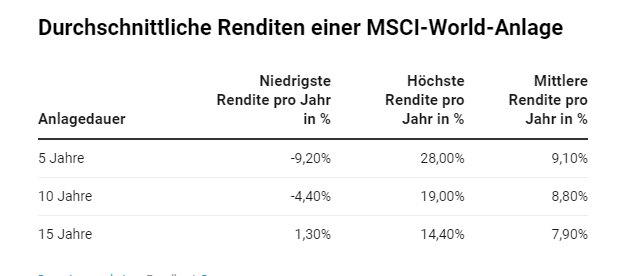

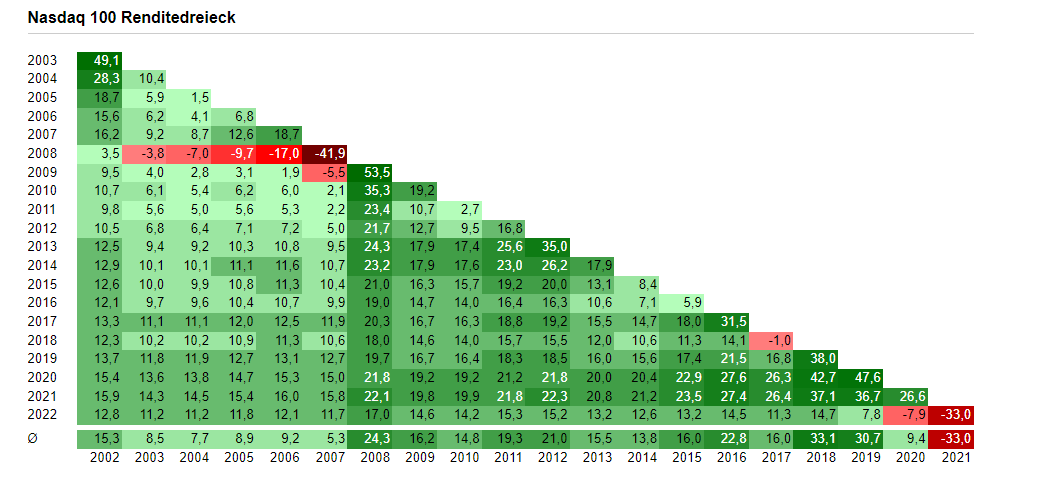